# AKS Algo

In [48]:
import math
from sympy.ntheory.factor_ import totient
import numpy as np

def stepuno(n):
    for b in range(2,int(math.log(n,2))+1):
        for a in range(2, int(n**0.5)+1):
            global stepcount
            stepcount += 1
            #print('a = '+str(a)+', b = '+str(b))
            if (n==a**b):
                #print('a^b = '+str(a)+'^'+str(b)+' equals '+str(n))
                return 'composite'
            #print('a^b = '+str(a)+'^'+str(b)+' does not equal '+str(n))
    return



def stepdos(n):
    count = 0
    #print(n)
    for r in range(2,max(3,int(math.log(n,2)**5)+1)):
        if count == int(math.log(n,2)**2)-1:
            #print(r-1, " Satisfies the conditions for multplicative order.")
            return r-1
        count = 0
        for k in range(1,int(math.log(n,2)**2)):
            global stepcount
            stepcount += 1
            count += 1
            #print("Testing r = ", r, "with k = ", k)
            if (n**k) % r == 1 or (n**k) % r == 0:
                #print("The given r and k fail the given conditions. Moving on to a new value for r.")
                break

def steptres(r,n):
    for a in range(2,r):
        #print("Checking if GCD(a,n) is within the bounds, where a = ", a)
        global stepcount
        stepcount += 1
        if math.gcd(a,n) > 1 and math.gcd(a,n) < n :
            #print("The GCD(a,n) is between 1 and n. Therefore ", n, " is composite.")
            return 'composite'
    return

def stepcuatro(n,r):
    if n <= r:
        global stepcount
        stepcount += 1
        #print('n is less than or equal to r. Therefore n must be prime')
        return 'prime'


def stepcinco(n,r):
    for a in range(1,int(totient(n)**0.5 * math.log(n,2))):
        global stepcount
        stepcount += 1
        stepcount += 1
        left_hand_side = np.poly1d([1,a])**n
        right_hand_side = np.poly1d([1]+[0 for i in range(n-2)]+[a])
        divisor = np.poly1d([1]+[0 for i in range(r-2)]+[-1])
        quotientLHS, remainderLHS = np.polydiv(left_hand_side, divisor)
        quotientRHS, remainderRHS = np.polydiv(right_hand_side, divisor)
        #print("Checking if a = ", a, " satisfies the stated property.")
        if(np.all(np.polysub(np.array(remainderLHS)%n,np.array(right_hand_side)) != 0)):
            print("The given value of a fails. Therefore n is composite.")
            return 'composite'



# Run through for numbers 2 through 1,000

In [ ]:
nums = 2
steps=[]
while nums < 1000:
  n = nums
  stepcount = 0
  composite = False 
  one = stepuno(n)

  if(one == 'composite'):
      composite = True
  if (composite == False):
      r = stepdos(n)
  if (composite == False):
      three = steptres(r,n)
      if(three == 'composite'):
          composite = True
  if (composite == False):
      four = stepcuatro(n,r)
      if(four == 'composite'):
          composite = True
  if (composite == False):
      five = stepcinco(n,r)
      if(five == 'composite'):
          composite = True
  steps.append(stepcount)
  nums += 1

Plotting the data generated in previous cell. Note that the data is stored in steps to prevent data loss when Colab closes

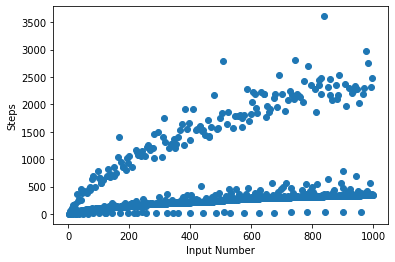

In [50]:
import matplotlib.pyplot as plt
import numpy as np
#store data from previous run
steps= [0,3,1,24,20,46,2,2,20,67,34,104,25,25,3,160,42,164,32,33,36,181,45,4,40,6,42,355,69,227,13,49,47,58,5,273,56,54,52,452,64,253,55,55,55,388,64,6,61,62,63,421,74,71,62,66,66,394,81,389,68,68,7,91,88,456,80,78,77,436,86,487,80,79,78,107,89,636,79,8,88,695,91,95,87,90,88,498,109,106,90,90,88,105,97,786,92,90,9,661,106,661,95,95,95,559,107,558,96,97,98,614,106,111,97,100,100,136,108,10,107,107,103,14,109,687,51,115,114,828,123,137,116,116,114,735,130,666,115,115,119,207,11,133,123,126,124,857,160,685,126,126,124,138,131,741,128,126,123,152,133,1041,126,125,125,1398,132,12,132,133,134,948,141,142,132,135,135,852,161,861,137,137,133,151,142,205,137,135,134,797,146,1020,136,135,13,924,152,1062,141,141,144,176,147,152,143,146,144,201,193,860,145,145,143,159,18,172,147,145,142,231,158,1176,144,14,150,1122,160,1073,151,151,152,1073,162,161,151,154,154,1058,176,1150,155,44,151,165,159,264,155,153,152,1052,159,218,154,153,15,1223,185,203,174,174,177,1263,184,183,175,178,177,1173,202,1201,178,178,176,192,185,1203,179,178,175,1021,188,1467,177,176,176,200,182,16,184,184,186,1497,192,194,184,187,187,303,198,214,188,188,185,196,196,1032,188,186,185,1412,194,1743,187,186,184,1310,201,259,186,186,189,364,17,205,194,197,195,221,208,1204,197,197,195,210,198,1285,198,196,193,246,204,23,196,195,195,1370,208,1202,196,196,197,1278,205,210,195,198,198,1407,219,18,207,207,203,217,212,1535,206,204,203,245,211,1637,206,205,203,316,213,1257,204,204,207,1910,210,212,205,208,206,1548,226,346,208,208,206,221,211,1659,209,207,19,1353,227,341,213,213,213,277,222,1914,214,214,215,250,220,223,213,216,216,1528,278,1559,218,218,214,232,222,252,217,215,214,1612,225,1584,216,215,213,510,226,1515,215,20,225,1538,233,233,223,226,224,1441,239,294,225,225,223,237,227,1707,227,225,222,1411,233,1427,224,223,223,1591,231,247,224,224,225,308,237,235,224,227,227,2162,244,339,228,228,21,243,242,1555,234,232,231,1567,241,386,234,233,231,269,242,1746,232,232,235,1842,236,238,233,236,234,2799,251,258,28,257,255,271,264,329,258,256,253,1642,265,1860,255,254,254,455,266,22,263,263,264,376,273,278,263,266,266,294,282,1560,267,267,263,277,270,1782,266,264,263,456,271,299,266,265,263,1793,278,356,264,264,267,1798,272,278,265,268,266,1750,296,1581,267,267,265,276,23,1800,277,275,272,300,283,366,274,273,273,2284,281,471,274,274,275,1698,281,281,273,277,277,1819,307,2036,278,278,274,293,283,2223,277,275,274,376,286,2181,276,275,273,1933,286,1848,275,275,278,313,280,24,284,287,285,445,338,2234,286,286,284,303,289,305,287,285,282,2195,298,2185,285,284,284,1777,292,361,285,285,286,1974,297,296,284,287,287,1865,300,1916,288,288,284,293,290,573,288,286,285,348,292,2124,287,286,25,2184,304,323,293,293,296,1947,303,301,294,297,295,399,316,2534,297,297,295,311,303,459,298,296,293,2184,305,492,295,294,294,329,302,1883,295,295,296,569,302,304,294,297,298,2078,310,327,299,299,295,311,307,2237,298,26,303,481,313,2173,305,304,302,387,317,2104,303,303,306,2816,310,317,305,308,306,330,327,2187,307,307,305,316,308,2156,308,306,303,2132,315,333,305,304,304,428,316,2041,305,305,307,2418,314,318,305,308,308,549,320,361,309,309,27,326,322,2704,316,314,313,343,319,418,315,314,312,2345,323,485,314,314,317,399,321,323,315,318,316,2288,344,1854,317,317,315,334,320,545,318,316,313,2437,329,2346,315,314,314,2480,323,2183,316,316,317,350,323,327,315,318,318,3609,363,28,327,327,323,338,330,355,326,324,323,645,336,2313,325,324,322,2455,335,2174,324,324,327,2081,333,332,325,328,326,405,339,433,327,327,325,339,329,2362,328,326,323,2103,333,2173,325,324,324,2540,332,347,325,326,327,569,338,336,325,328,328,781,29,468,337,337,333,348,345,2364,336,334,333,1978,342,405,335,334,332,371,342,2292,333,333,336,446,340,343,335,338,336,2204,367,363,337,337,335,347,342,2265,338,336,333,2343,346,689,335,334,334,2274,347,418,335,335,336,2024,343,347,335,338,338,373,358,30,347,347,343,358,350,2191,346,344,343,2291,351,377,345,344,342,2976,358,421,343,343,346,2754,350,356,344,347,345,563,371,2321,347,347,345,359,351,2490,348,346]
step_np = np.array(steps)
step_range = np.array([i for i in range(2,1000)])
plt.scatter(step_range, step_np)
plt.ylabel("Steps")
plt.xlabel("Input Number")
plt.show()

Note that the data is stored in steps to prevent data loss when Colab closes

# Runtime of all the primes less than 3000

In [51]:
primes= [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997, 1009, 1013, 1019, 1021, 1031, 1033, 1039, 1049, 1051, 1061, 1063, 1069, 1087, 1091, 1093, 1097, 1103, 1109, 1117, 1123, 1129, 1151, 1153, 1163, 1171, 1181, 1187, 1193, 1201, 1213, 1217, 1223, 1229, 1231, 1237, 1249, 1259, 1277, 1279, 1283, 1289, 1291, 1297, 1301, 1303, 1307, 1319, 1321, 1327, 1361, 1367, 1373, 1381, 1399, 1409, 1423, 1427, 1429, 1433, 1439, 1447, 1451, 1453, 1459, 1471, 1481, 1483, 1487, 1489, 1493, 1499, 1511, 1523, 1531, 1543, 1549, 1553, 1559, 1567, 1571, 1579, 1583, 1597, 1601, 1607, 1609, 1613, 1619, 1621, 1627, 1637, 1657, 1663, 1667, 1669, 1693, 1697, 1699, 1709, 1721, 1723, 1733, 1741, 1747, 1753, 1759, 1777, 1783, 1787, 1789, 1801, 1811, 1823, 1831, 1847, 1861, 1867, 1871, 1873, 1877, 1879, 1889, 1901, 1907, 1913, 1931, 1933, 1949, 1951, 1973, 1979, 1987, 1993, 1997, 1999, 2003, 2011, 2017, 2027, 2029, 2039, 2053, 2063, 2069, 2081, 2083, 2087, 2089, 2099, 2111, 2113, 2129, 2131, 2137, 2141, 2143, 2153, 2161, 2179, 2203, 2207, 2213, 2221, 2237, 2239, 2243, 2251, 2267, 2269, 2273, 2281, 2287, 2293, 2297, 2309, 2311, 2333, 2339, 2341, 2347, 2351, 2357, 2371, 2377, 2381, 2383, 2389, 2393, 2399, 2411, 2417, 2423, 2437, 2441, 2447, 2459, 2467, 2473, 2477, 2503, 2521, 2531, 2539, 2543, 2549, 2551, 2557, 2579, 2591, 2593, 2609, 2617, 2621, 2633, 2647, 2657, 2659, 2663, 2671, 2677, 2683, 2687, 2689, 2693, 2699, 2707, 2711, 2713, 2719, 2729, 2731, 2741, 2749, 2753, 2767, 2777, 2789, 2791, 2797, 2801, 2803, 2819, 2833, 2837, 2843, 2851, 2857, 2861, 2879, 2887, 2897, 2903, 2909, 2917, 2927, 2939, 2953, 2957, 2963, 2969, 2971, 2999]
steps=[0, 3, 24, 46, 67, 104, 160, 164, 181, 355, 227, 273, 452, 253, 388, 421, 394, 389, 456, 436, 487, 636, 695, 498, 786, 661, 661, 559, 558, 614, 687, 828, 735, 666, 857, 685, 741, 1041, 1398, 948, 852, 861, 797, 1020, 924, 1062, 860, 1176, 1122, 1073, 1073, 1058, 1150, 1052, 1223, 1263, 1173, 1201, 1203, 1021, 1467, 1497, 1032, 1412, 1743, 1310, 1204, 1285, 1370, 1202, 1278, 1407, 1535, 1637, 1257, 1910, 1548, 1659, 1353, 1914, 1528, 1559, 1612, 1584, 1515, 1538, 1441, 1707, 1411, 1427, 1591, 2162, 1555, 1567, 1746, 1842, 2799, 1642, 1860, 1560, 1782, 1793, 1798, 1750, 1581, 1800, 2284, 1698, 1819, 2036, 2223, 2181, 1933, 1848, 2234, 2195, 2185, 1777, 1974, 1865, 1916, 2124, 2184, 1947, 2534, 2184, 1883, 2078, 2237, 2173, 2104, 2816, 2187, 2156, 2132, 2041, 2418, 2704, 2345, 2288, 1854, 2437, 2346, 2480, 2183, 3609, 2313, 2455, 2174, 2081, 2362, 2103, 2173, 2540, 2364, 1978, 2292, 2204, 2265, 2343, 2274, 2024, 2191, 2291, 2976, 2754, 2321, 2490, 2573, 2396, 2822, 2154, 2487, 2550, 2373, 3176, 2397, 2346, 2345, 2338, 2610, 2542, 2460, 2448, 2757, 2792, 2355, 3523, 2707, 2885, 2587, 2802, 3406, 3044, 3595, 2851, 2796, 2905, 2840, 2738, 2923, 2367, 2855, 2557, 2661, 2838, 3512, 3093, 2710, 2682, 2579, 2663, 3235, 3708, 2975, 2868, 2733, 2940, 2829, 3072, 3214, 2786, 3394, 3008, 2923, 3486, 4117, 3981, 3672, 3011, 3406, 3004, 2944, 3102, 3210, 3712, 3084, 3080, 3534, 2865, 3392, 3034, 3253, 2904, 3151, 3080, 3380, 4468, 2980, 3632, 3367, 2963, 3018, 3187, 3750, 3116, 3163, 3228, 3083, 3412, 3937, 3602, 3567, 4254, 3616, 3142, 3226, 3458, 4081, 4098, 3567, 3290, 3893, 3301, 3812, 4098, 4080, 4311, 3336, 4801, 3676, 3440, 4012, 3231, 4501, 3309, 3814, 4176, 3572, 3550, 3698, 4643, 3666, 3760, 3944, 3815, 3340, 3645, 3579, 4031, 4098, 4035, 3748, 3965, 3798, 3753, 4277, 3762, 3841, 3864, 4035, 3458, 4066, 3864, 3691, 3568, 3590, 4075, 3973, 3761, 4989, 4287, 3633, 3539, 4158, 4004, 3708, 4773, 4115, 4215, 3850, 4146, 4157, 4030, 3800, 3613, 3407, 4015, 3754, 3961, 3637, 4452, 3627, 4449, 3967, 3774, 3974, 3925, 4152, 4392, 3808, 3806, 3728, 4156, 4126, 4158, 4115, 4063, 4775, 4260, 3965, 3738, 5097]

#for n in primes:
 # stepcount = 0
  #composite = False 
  #one = stepuno(n)

  #if(one == 'composite'):
   #   composite = True
  #if (composite == False):
   #   r = stepdos(n)
  #if (composite == False):
   #   three = steptres(r,n)
    #  if(three == 'composite'):
     #     composite = True
  #if (composite == False):
   #   four = stepcuatro(n,r)
    #  if(four == 'composite'):
     #     composite = True
  #if (composite == False):
  #   five = stepcinco(n,r)
    #   if(five == 'composite'):
     #     composite = True
  #steps.append(stepcount)

1.0073809029234086 -72.99798909735767


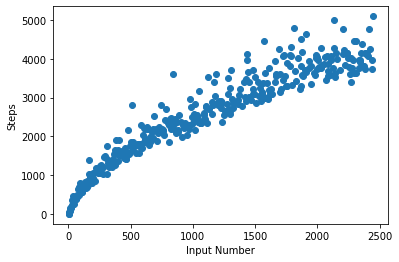

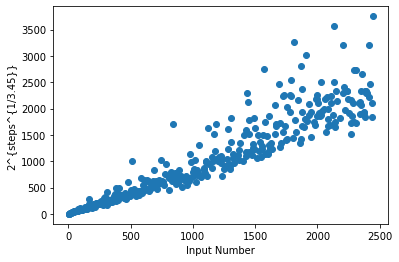

In [53]:
import matplotlib.pyplot as plt
hold = primes
count = 0
new_nums = []
for i in range(len(steps)):
  new_nums.append(primes[i])
stepstwo = steps
stepstwo = 2**(np.array(steps)**(1/3.45))

##we prolly should not be plotting stepstwo against steps

a,b = np.polyfit(new_nums,stepstwo,1)
print(a,b)

plt.scatter(new_nums,steps)
plt.ylabel("Steps")
plt.xlabel("Input Number")
plt.show()

plt.scatter(new_nums, stepstwo)
plt.ylabel("2^{steps^{1/3.45}}")
plt.xlabel("Input Number")


plt.show()


In [ ]:
print(steps)

[0, 3, 24, 46, 67, 104, 160, 164, 181, 355, 227, 273, 452, 253, 388, 421, 394, 389, 456, 436, 487, 636, 695, 498, 786, 661, 661, 559, 558, 614, 687, 828, 735, 666, 857, 685, 741, 1041, 1398, 948, 852, 861, 797, 1020, 924, 1062, 860, 1176, 1122, 1073, 1073, 1058, 1150, 1052, 1223, 1263, 1173, 1201, 1203, 1021, 1467, 1497, 1032, 1412, 1743, 1310, 1204, 1285, 1370, 1202, 1278, 1407, 1535, 1637, 1257, 1910, 1548, 1659, 1353, 1914, 1528, 1559, 1612, 1584, 1515, 1538, 1441, 1707, 1411, 1427, 1591, 2162, 1555, 1567, 1746, 1842, 2799, 1642, 1860, 1560, 1782, 1793, 1798, 1750, 1581, 1800, 2284, 1698, 1819, 2036, 2223, 2181, 1933, 1848, 2234, 2195, 2185, 1777, 1974, 1865, 1916, 2124, 2184, 1947, 2534, 2184, 1883, 2078, 2237, 2173, 2104, 2816, 2187, 2156, 2132, 2041, 2418, 2704, 2345, 2288, 1854, 2437, 2346, 2480, 2183, 3609, 2313, 2455, 2174, 2081, 2362, 2103, 2173, 2540, 2364, 1978, 2292, 2204, 2265, 2343, 2274, 2024, 2191, 2291, 2976, 2754, 2321, 2490, 2573, 2396, 2822, 2154, 2487, 2550, 2373,

# Runtime of all composites less than 3000

In [18]:
composites = [4, 6, 8, 9, 10, 12, 14, 15, 16, 18, 20, 21, 22, 24, 25, 26, 27, 28, 30, 32, 33, 34, 35, 36, 38, 39, 40, 42, 44, 45, 46, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 60, 62, 63, 64, 65, 66, 68, 69, 70, 72, 74, 75, 76, 77, 78, 80, 81, 82, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 98, 99, 100, 102, 104, 105, 106, 108, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 132, 133, 134, 135, 136, 138, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 152, 153, 154, 155, 156, 158, 159, 160, 161, 162, 164, 165, 166, 168, 169, 170, 171, 172, 174, 175, 176, 177, 178, 180, 182, 183, 184, 185, 186, 187, 188, 189, 190, 192, 194, 195, 196, 198, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 224, 225, 226, 228, 230, 231, 232, 234, 235, 236, 237, 238, 240, 242, 243, 244, 245, 246, 247, 248, 249, 250, 252, 253, 254, 255, 256, 258, 259, 260, 261, 262, 264, 265, 266, 267, 268, 270, 272, 273, 274, 275, 276, 278, 279, 280, 282, 284, 285, 286, 287, 288, 289, 290, 291, 292, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 308, 309, 310, 312, 314, 315, 316, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 332, 333, 334, 335, 336, 338, 339, 340, 341, 342, 343, 344, 345, 346, 348, 350, 351, 352, 354, 355, 356, 357, 358, 360, 361, 362, 363, 364, 365, 366, 368, 369, 370, 371, 372, 374, 375, 376, 377, 378, 380, 381, 382, 384, 385, 386, 387, 388, 390, 391, 392, 393, 394, 395, 396, 398, 399, 400, 402, 403, 404, 405, 406, 407, 408, 410, 411, 412, 413, 414, 415, 416, 417, 418, 420, 422, 423, 424, 425, 426, 427, 428, 429, 430, 432, 434, 435, 436, 437, 438, 440, 441, 442, 444, 445, 446, 447, 448, 450, 451, 452, 453, 454, 455, 456, 458, 459, 460, 462, 464, 465, 466, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 480, 481, 482, 483, 484, 485, 486, 488, 489, 490, 492, 493, 494, 495, 496, 497, 498, 500, 501, 502, 504, 505, 506, 507, 508, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 522, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 542, 543, 544, 545, 546, 548, 549, 550, 551, 552, 553, 554, 555, 556, 558, 559, 560, 561, 562, 564, 565, 566, 567, 568, 570, 572, 573, 574, 575, 576, 578, 579, 580, 581, 582, 583, 584, 585, 586, 588, 589, 590, 591, 592, 594, 595, 596, 597, 598, 600, 602, 603, 604, 605, 606, 608, 609, 610, 611, 612, 614, 615, 616, 618, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 632, 633, 634, 635, 636, 637, 638, 639, 640, 642, 644, 645, 646, 648, 649, 650, 651, 652, 654, 655, 656, 657, 658, 660, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 674, 675, 676, 678, 679, 680, 681, 682, 684, 685, 686, 687, 688, 689, 690, 692, 693, 694, 695, 696, 697, 698, 699, 700, 702, 703, 704, 705, 706, 707, 708, 710, 711, 712, 713, 714, 715, 716, 717, 718, 720, 721, 722, 723, 724, 725, 726, 728, 729, 730, 731, 732, 734, 735, 736, 737, 738, 740, 741, 742, 744, 745, 746, 747, 748, 749, 750, 752, 753, 754, 755, 756, 758, 759, 760, 762, 763, 764, 765, 766, 767, 768, 770, 771, 772, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 788, 789, 790, 791, 792, 793, 794, 795, 796, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 810, 812, 813, 814, 815, 816, 817, 818, 819, 820, 822, 824, 825, 826, 828, 830, 831, 832, 833, 834, 835, 836, 837, 838, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 854, 855, 856, 858, 860, 861, 862, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 878, 879, 880, 882, 884, 885, 886, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 908, 909, 910, 912, 913, 914, 915, 916, 917, 918, 920, 921, 922, 923, 924, 925, 926, 927, 928, 930, 931, 932, 933, 934, 935, 936, 938, 939, 940, 942, 943, 944, 945, 946, 948, 949, 950, 951, 952, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 968, 969, 970, 972, 973, 974, 975, 976, 978, 979, 980, 981, 982, 984, 985, 986, 987, 988, 989, 990, 992, 993, 994, 995, 996, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1010, 1011, 1012, 1014, 1015, 1016, 1017, 1018, 1020, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1032, 1034, 1035, 1036, 1037, 1038, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1050, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1062, 1064, 1065, 1066, 1067, 1068, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1088, 1089, 1090, 1092, 1094, 1095, 1096, 1098, 1099, 1100, 1101, 1102, 1104, 1105, 1106, 1107, 1108, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1118, 1119, 1120, 1121, 1122, 1124, 1125, 1126, 1127, 1128, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1152, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1182, 1183, 1184, 1185, 1186, 1188, 1189, 1190, 1191, 1192, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1214, 1215, 1216, 1218, 1219, 1220, 1221, 1222, 1224, 1225, 1226, 1227, 1228, 1230, 1232, 1233, 1234, 1235, 1236, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1278, 1280, 1281, 1282, 1284, 1285, 1286, 1287, 1288, 1290, 1292, 1293, 1294, 1295, 1296, 1298, 1299, 1300, 1302, 1304, 1305, 1306, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1320, 1322, 1323, 1324, 1325, 1326, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1362, 1363, 1364, 1365, 1366, 1368, 1369, 1370, 1371, 1372, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1424, 1425, 1426, 1428, 1430, 1431, 1432, 1434, 1435, 1436, 1437, 1438, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1448, 1449, 1450, 1452, 1454, 1455, 1456, 1457, 1458, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1482, 1484, 1485, 1486, 1488, 1490, 1491, 1492, 1494, 1495, 1496, 1497, 1498, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1544, 1545, 1546, 1547, 1548, 1550, 1551, 1552, 1554, 1555, 1556, 1557, 1558, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1568, 1569, 1570, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1580, 1581, 1582, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1598, 1599, 1600, 1602, 1603, 1604, 1605, 1606, 1608, 1610, 1611, 1612, 1614, 1615, 1616, 1617, 1618, 1620, 1622, 1623, 1624, 1625, 1626, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1658, 1659, 1660, 1661, 1662, 1664, 1665, 1666, 1668, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1694, 1695, 1696, 1698, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1722, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1734, 1735, 1736, 1737, 1738, 1739, 1740, 1742, 1743, 1744, 1745, 1746, 1748, 1749, 1750, 1751, 1752, 1754, 1755, 1756, 1757, 1758, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1778, 1779, 1780, 1781, 1782, 1784, 1785, 1786, 1788, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1862, 1863, 1864, 1865, 1866, 1868, 1869, 1870, 1872, 1874, 1875, 1876, 1878, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1902, 1903, 1904, 1905, 1906, 1908, 1909, 1910, 1911, 1912, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1932, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1950, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1974, 1975, 1976, 1977, 1978, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1988, 1989, 1990, 1991, 1992, 1994, 1995, 1996, 1998, 2000, 2001, 2002, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2012, 2013, 2014, 2015, 2016, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2028, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2064, 2065, 2066, 2067, 2068, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2082, 2084, 2085, 2086, 2088, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2112, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128, 2130, 2132, 2133, 2134, 2135, 2136, 2138, 2139, 2140, 2142, 2144, 2145, 2146, 2147, 2148, 2149, 2150, 2151, 2152, 2154, 2155, 2156, 2157, 2158, 2159, 2160, 2162, 2163, 2164, 2165, 2166, 2167, 2168, 2169, 2170, 2171, 2172, 2173, 2174, 2175, 2176, 2177, 2178, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2204, 2205, 2206, 2208, 2209, 2210, 2211, 2212, 2214, 2215, 2216, 2217, 2218, 2219, 2220, 2222, 2223, 2224, 2225, 2226, 2227, 2228, 2229, 2230, 2231, 2232, 2233, 2234, 2235, 2236, 2238, 2240, 2241, 2242, 2244, 2245, 2246, 2247, 2248, 2249, 2250, 2252, 2253, 2254, 2255, 2256, 2257, 2258, 2259, 2260, 2261, 2262, 2263, 2264, 2265, 2266, 2268, 2270, 2271, 2272, 2274, 2275, 2276, 2277, 2278, 2279, 2280, 2282, 2283, 2284, 2285, 2286, 2288, 2289, 2290, 2291, 2292, 2294, 2295, 2296, 2298, 2299, 2300, 2301, 2302, 2303, 2304, 2305, 2306, 2307, 2308, 2310, 2312, 2313, 2314, 2315, 2316, 2317, 2318, 2319, 2320, 2321, 2322, 2323, 2324, 2325, 2326, 2327, 2328, 2329, 2330, 2331, 2332, 2334, 2335, 2336, 2337, 2338, 2340, 2342, 2343, 2344, 2345, 2346, 2348, 2349, 2350, 2352, 2353, 2354, 2355, 2356, 2358, 2359, 2360, 2361, 2362, 2363, 2364, 2365, 2366, 2367, 2368, 2369, 2370, 2372, 2373, 2374, 2375, 2376, 2378, 2379, 2380, 2382, 2384, 2385, 2386, 2387, 2388, 2390, 2391, 2392, 2394, 2395, 2396, 2397, 2398, 2400, 2401, 2402, 2403, 2404, 2405, 2406, 2407, 2408, 2409, 2410, 2412, 2413, 2414, 2415, 2416, 2418, 2419, 2420, 2421, 2422, 2424, 2425, 2426, 2427, 2428, 2429, 2430, 2431, 2432, 2433, 2434, 2435, 2436, 2438, 2439, 2440, 2442, 2443, 2444, 2445, 2446, 2448, 2449, 2450, 2451, 2452, 2453, 2454, 2455, 2456, 2457, 2458, 2460, 2461, 2462, 2463, 2464, 2465, 2466, 2468, 2469, 2470, 2471, 2472, 2474, 2475, 2476, 2478, 2479, 2480, 2481, 2482, 2483, 2484, 2485, 2486, 2487, 2488, 2489, 2490, 2491, 2492, 2493, 2494, 2495, 2496, 2497, 2498, 2499, 2500, 2501, 2502, 2504, 2505, 2506, 2507, 2508, 2509, 2510, 2511, 2512, 2513, 2514, 2515, 2516, 2517, 2518, 2519, 2520, 2522, 2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530, 2532, 2533, 2534, 2535, 2536, 2537, 2538, 2540, 2541, 2542, 2544, 2545, 2546, 2547, 2548, 2550, 2552, 2553, 2554, 2555, 2556, 2558, 2559, 2560, 2561, 2562, 2563, 2564, 2565, 2566, 2567, 2568, 2569, 2570, 2571, 2572, 2573, 2574, 2575, 2576, 2577, 2578, 2580, 2581, 2582, 2583, 2584, 2585, 2586, 2587, 2588, 2589, 2590, 2592, 2594, 2595, 2596, 2597, 2598, 2599, 2600, 2601, 2602, 2603, 2604, 2605, 2606, 2607, 2608, 2610, 2611, 2612, 2613, 2614, 2615, 2616, 2618, 2619, 2620, 2622, 2623, 2624, 2625, 2626, 2627, 2628, 2629, 2630, 2631, 2632, 2634, 2635, 2636, 2637, 2638, 2639, 2640, 2641, 2642, 2643, 2644, 2645, 2646, 2648, 2649, 2650, 2651, 2652, 2653, 2654, 2655, 2656, 2658, 2660, 2661, 2662, 2664, 2665, 2666, 2667, 2668, 2669, 2670, 2672, 2673, 2674, 2675, 2676, 2678, 2679, 2680, 2681, 2682, 2684, 2685, 2686, 2688, 2690, 2691, 2692, 2694, 2695, 2696, 2697, 2698, 2700, 2701, 2702, 2703, 2704, 2705, 2706, 2708, 2709, 2710, 2712, 2714, 2715, 2716, 2717, 2718, 2720, 2721, 2722, 2723, 2724, 2725, 2726, 2727, 2728, 2730, 2732, 2733, 2734, 2735, 2736, 2737, 2738, 2739, 2740, 2742, 2743, 2744, 2745, 2746, 2747, 2748, 2750, 2751, 2752, 2754, 2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763, 2764, 2765, 2766, 2768, 2769, 2770, 2771, 2772, 2773, 2774, 2775, 2776, 2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785, 2786, 2787, 2788, 2790, 2792, 2793, 2794, 2795, 2796, 2798, 2799, 2800, 2802, 2804, 2805, 2806, 2807, 2808, 2809, 2810, 2811, 2812, 2813, 2814, 2815, 2816, 2817, 2818, 2820, 2821, 2822, 2823, 2824, 2825, 2826, 2827, 2828, 2829, 2830, 2831, 2832, 2834, 2835, 2836, 2838, 2839, 2840, 2841, 2842, 2844, 2845, 2846, 2847, 2848, 2849, 2850, 2852, 2853, 2854, 2855, 2856, 2858, 2859, 2860, 2862, 2863, 2864, 2865, 2866, 2867, 2868, 2869, 2870, 2871, 2872, 2873, 2874, 2875, 2876, 2877, 2878, 2880, 2881, 2882, 2883, 2884, 2885, 2886, 2888, 2889, 2890, 2891, 2892, 2893, 2894, 2895, 2896, 2898, 2899, 2900, 2901, 2902, 2904, 2905, 2906, 2907, 2908, 2910, 2911, 2912, 2913, 2914, 2915, 2916, 2918, 2919, 2920, 2921, 2922, 2923, 2924, 2925, 2926, 2928, 2929, 2930, 2931, 2932, 2933, 2934, 2935, 2936, 2937, 2938, 2940, 2941, 2942, 2943, 2944, 2945, 2946, 2947, 2948, 2949, 2950, 2951, 2952, 2954, 2955, 2956, 2958, 2959, 2960, 2961, 2962, 2964, 2965, 2966, 2967, 2968, 2970, 2972, 2973, 2974, 2975, 2976, 2977, 2978, 2979, 2980, 2981, 2982, 2983, 2984, 2985, 2986, 2987, 2988, 2989, 2990, 2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998, 3000]
steps_composites=[]
new_composites = []
for n in composites:
  stepcount = 0
  composite = False 
  one = stepuno(n)

  if(one == 'composite'):
      composite = True
  if (composite == False):
      r = stepdos(n)
  if (composite == False):
      three = steptres(r,n)
      if(three == 'composite'):
          composite = True
  if (composite == False):
      four = stepcuatro(n,r)
      if(four == 'composite'):
          composite = True
  if (composite == False):
      five = stepcinco(n,r)
      if(five == 'composite'):
          composite = True
  if(one != 'composite'):
    steps_composites.append(stepcount)
    new_composites.append(n)

1.0225976244703117 -413.6747976812836


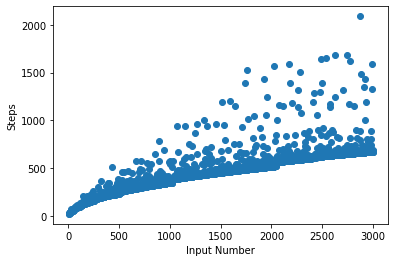

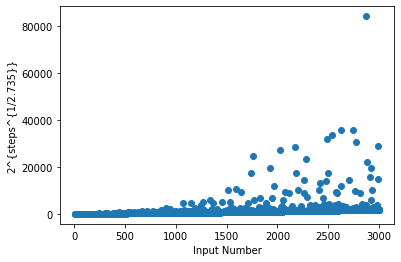

In [54]:
##Note i excluded all perfect powers as outliers cause they took ~relatively~ no steps
##New issue is the 

import matplotlib.pyplot as plt

pls_comp = new_composites



pls_hold = 2**(np.array(steps_composites)**(1/2.735))

c,d = np.polyfit(new_composites,pls_hold,1)
print(c,d)

plt.scatter(new_composites, steps_composites)
plt.ylabel("Steps")
plt.xlabel("Input Number")
plt.show()

plt.scatter(new_composites, pls_hold)
plt.ylabel("2^{steps^{1/2.735}}")
plt.xlabel("Input Number")

plt.show()